# Homework 4 

1. Acquire power data (https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemand/historic) for 7 days (Include each day of the week)

1. Create two bar graphs of the power consumption per hour.

    * One bar graph has 24 bars showing the average consumption
    * One bar graph has 7x24 bars showing the average demand 

1. Your solution should be committed in your Week04 folder.

Graphs must have appropriate labels and there should not be anything extra cluttering. 

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/Achal Gupta/Downloads/RollingSystemDemand_20220302_0144.csv", index_col= False, skiprows = 1, header=None, skipfooter =1)
df

C:\Anaconda\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,0,1,2
0,VD,20220222000000,26741
1,VD,20220222000500,26861
2,VD,20220222001000,26948
3,VD,20220222001500,26808
4,VD,20220222002000,26676
...,...,...,...
1995,VD,20220228221500,32620
1996,VD,20220228222000,32275
1997,VD,20220228222500,31939
1998,VD,20220228223000,31662


In [2]:
df.columns = ['VD', 'Date and Time', 'Demand']
df

,VD,Date and Time,Demand
0,VD,20220222000000,26741
1,VD,20220222000500,26861
2,VD,20220222001000,26948
3,VD,20220222001500,26808
4,VD,20220222002000,26676
...,...,...,...
1995,VD,20220228221500,32620
1996,VD,20220228222000,32275
1997,VD,20220228222500,31939
1998,VD,20220228223000,31662


In [3]:
df['Date and Time'] = pd.to_datetime(df['Date and Time'].astype(str), format='%Y%m%d%H%M%S')
df

,VD,Date and Time,Demand
0,VD,2022-02-22 00:00:00,26741
1,VD,2022-02-22 00:05:00,26861
2,VD,2022-02-22 00:10:00,26948
3,VD,2022-02-22 00:15:00,26808
4,VD,2022-02-22 00:20:00,26676
...,...,...,...
1995,VD,2022-02-28 22:15:00,32620
1996,VD,2022-02-28 22:20:00,32275
1997,VD,2022-02-28 22:25:00,31939
1998,VD,2022-02-28 22:30:00,31662


In [4]:
sample = df.resample('H', on= 'Date and Time')
sample1 = sample.Demand.mean()
sample1

Date and Time
2022-02-22 00:00:00    26873.166667
2022-02-22 01:00:00    26657.416667
2022-02-22 02:00:00    25878.083333
2022-02-22 03:00:00    24927.250000
2022-02-22 04:00:00    24849.000000
                           ...     
2022-02-28 18:00:00    42990.083333
2022-02-28 19:00:00    41049.583333
2022-02-28 20:00:00    38387.166667
2022-02-28 21:00:00    35516.083333
2022-02-28 22:00:00    32446.000000
Freq: H, Name: Demand, Length: 167, dtype: float64

In [5]:
df1 = pd.DataFrame({'date_and_time':sample1.index,'Demand':sample1})
df1

,date_and_time,Demand
Date and Time,,
2022-02-22 00:00:00,2022-02-22 00:00:00,26873.166667
2022-02-22 01:00:00,2022-02-22 01:00:00,26657.416667
2022-02-22 02:00:00,2022-02-22 02:00:00,25878.083333
2022-02-22 03:00:00,2022-02-22 03:00:00,24927.250000
2022-02-22 04:00:00,2022-02-22 04:00:00,24849.000000
...,...,...
2022-02-28 18:00:00,2022-02-28 18:00:00,42990.083333
2022-02-28 19:00:00,2022-02-28 19:00:00,41049.583333
2022-02-28 20:00:00,2022-02-28 20:00:00,38387.166667


In [6]:
df1['date'] = [d.date() for d in df1['date_and_time']]
df1['time'] = [d.time() for d in df1['date_and_time']]
df1

,date_and_time,Demand,date,time
Date and Time,,,,
2022-02-22 00:00:00,2022-02-22 00:00:00,26873.166667,2022-02-22,00:00:00
2022-02-22 01:00:00,2022-02-22 01:00:00,26657.416667,2022-02-22,01:00:00
2022-02-22 02:00:00,2022-02-22 02:00:00,25878.083333,2022-02-22,02:00:00
2022-02-22 03:00:00,2022-02-22 03:00:00,24927.250000,2022-02-22,03:00:00
2022-02-22 04:00:00,2022-02-22 04:00:00,24849.000000,2022-02-22,04:00:00
...,...,...,...,...
2022-02-28 18:00:00,2022-02-28 18:00:00,42990.083333,2022-02-28,18:00:00
2022-02-28 19:00:00,2022-02-28 19:00:00,41049.583333,2022-02-28,19:00:00
2022-02-28 20:00:00,2022-02-28 20:00:00,38387.166667,2022-02-28,20:00:00


In [7]:
grouped_df = df1.groupby(['time']).agg(
    Hourly_Mean = ('Demand', 'mean')
)

grouped_df

,Hourly_Mean
time,
00:00:00,26569.404762
01:00:00,26555.619048
02:00:00,25845.071429
03:00:00,25079.666667
04:00:00,24857.119048
05:00:00,25328.345238
06:00:00,28041.250000
07:00:00,31495.464286
08:00:00,33391.440476


In [8]:
df2 = pd.DataFrame({'time':grouped_df.index,'Demand':grouped_df.Hourly_Mean})
df2['time'] = df2['time'].astype(str)
df2

,time,Demand
time,,
00:00:00,00:00:00,26569.404762
01:00:00,01:00:00,26555.619048
02:00:00,02:00:00,25845.071429
03:00:00,03:00:00,25079.666667
04:00:00,04:00:00,24857.119048
05:00:00,05:00:00,25328.345238
06:00:00,06:00:00,28041.250000
07:00:00,07:00:00,31495.464286
08:00:00,08:00:00,33391.440476


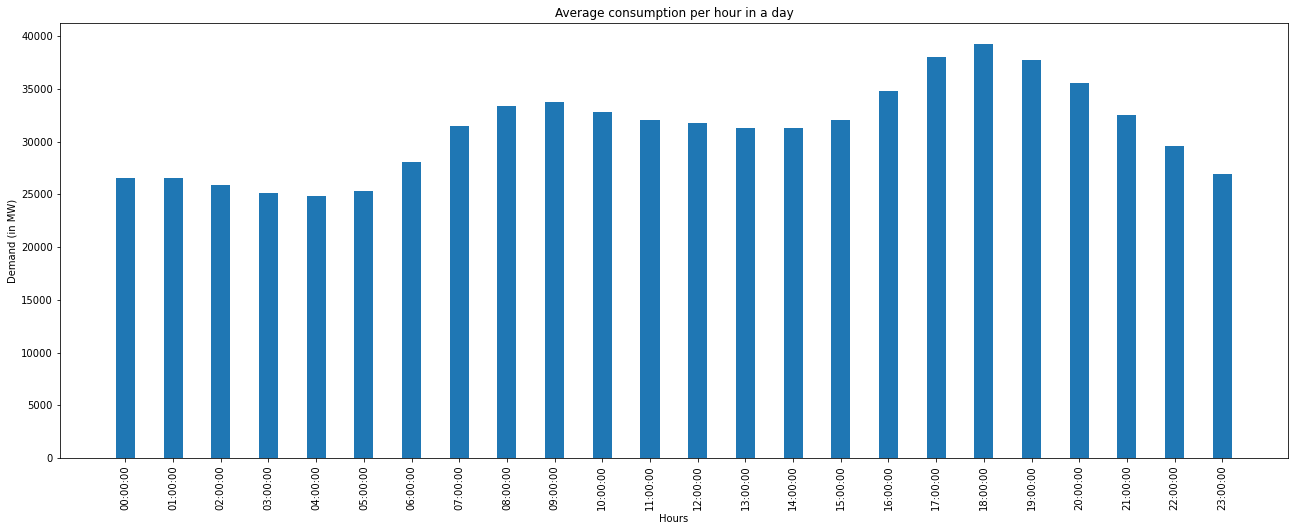

In [9]:
# One bar graph has 24 bars showing the average consumption

plt.figure(figsize = (22, 8))
plt.bar(df2['time'].values, grouped_df['Hourly_Mean'].values, width = 0.4)
plt.title("Average consumption per hour in a day")
plt.xlabel('Hours')
plt.ylabel('Demand (in MW)')
plt.xticks(rotation = 90)
plt.show()

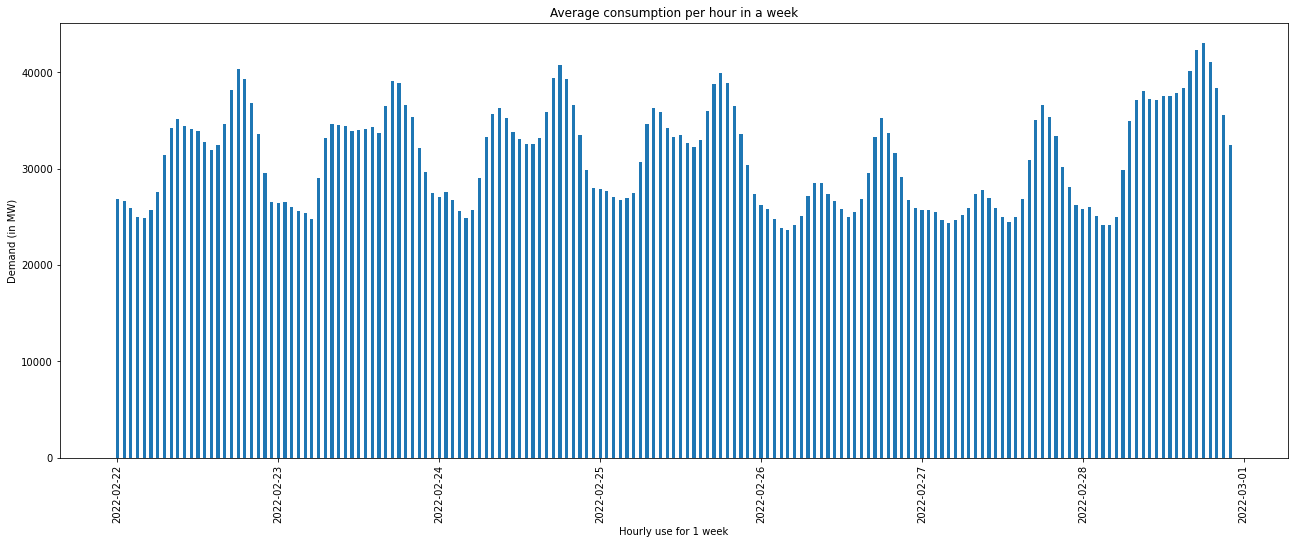

In [10]:
# One bar graph has 7x24 bars showing the average demand

plt.figure(figsize = (22, 8))
plt.bar(sample1.index, sample1.values, width=0.02)
plt.title("Average consumption per hour in a week")
plt.xlabel("Hourly use for 1 week")
plt.ylabel("Demand (in MW)")
plt.xticks(rotation=90)
plt.show()